In [1]:
%load_ext autoreload
%autoreload 2

import pymc4 as pm
import tensorflow as tf
import numpy as np

In [2]:
import tensorflow_probability as tfp
sample_sequential_monte_carlo_chain = tfp.experimental.mcmc.sample_sequential_monte_carlo
#sample_sequential_monte_carlo_chain?

In [3]:
Y = np.float32(np.random.random((600,))+2.)

In [4]:
Y.mean()

2.5011907

In [5]:
@pm.model
def model():
    mu = yield pm.Normal("mu", 0, 1)
    x = yield pm.Normal("x", mu, 1, observed=Y)
    return x

In [12]:
%%time
trace = pm.sample(model(), num_chains=10)

CPU times: user 8.22 s, sys: 432 ms, total: 8.65 s
Wall time: 6.75 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f633c207eb8>,
      dtype=object)

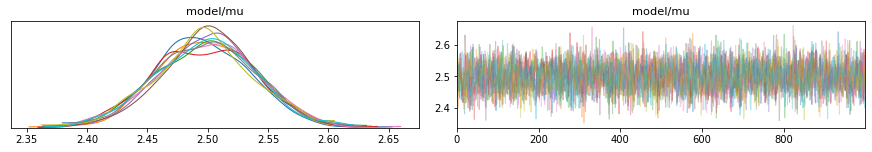

In [13]:
import arviz as az
az.plot_trace(trace)

In [14]:
#%%time
#trace = pm.sample(model(), initialize_smc=True)

In [8]:
# we have an overhead

In [9]:
trace[0].shape

TypeError: 'InferenceData' object is not subscriptable

In [ ]:
import seaborn as sns
sns.distplot(trace[0][:,1])
sns.distplot(trace[0][:,2])
sns.distplot(trace[0][:,0])

In [ ]:
pm.Normal.dist(0, tf.ones(100)).q

In [ ]:
pm.Normal.dist(0, tf.ones((5000,10))).log_prob(tf.ones((100,5000,10))).shape

In [ ]:
TensorShape([5000, 10, 100])
(Pdb) distr["model/x"].sample().shape
*** NameError: name 'distr' is not defined
(Pdb) distrs["model/x"].sample().shape
TensorShape([5000, 10])
(Pdb) q

In [ ]:
tf.transpose(tf.ones((1,2,3,4)), list(range(2,-1,-1))+[3]).shape

In [ ]:
list(range(2,-1,-1))+[3]

In [ ]:
tf.reduce_mean(tf.ones((1,2,3,4)),axis=list(range(0,2))+[-1])